In [160]:
# !pip install opencv-python
# !pip install numpy
# !pip install matplotlib
# !pip install scipy
# !pip install imageio
# !pip install bm3d
# !pip install scikit-image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
import imageio
import bm3d
from skimage.restoration import denoise_nl_means, estimate_sigma, denoise_tv_chambolle
from skimage import img_as_float, img_as_ubyte, io, color, measure
from scipy import ndimage as nd

import copy

In [2]:
!conda info


     active environment : oelp
    active env location : C:\Users\sneha\anaconda3\envs\oelp
            shell level : 1
       user config file : C:\Users\sneha\.condarc
 populated config files : C:\Users\sneha\.condarc
          conda version : 4.10.1
    conda-build version : 3.21.4
         python version : 3.8.8.final.0
       virtual packages : __cuda=11.4=0
                          __win=0=0
                          __archspec=1=x86_64
       base environment : C:\Users\sneha\anaconda3  (writable)
      conda av data dir : C:\Users\sneha\anaconda3\etc\conda
  conda av metadata url : https://repo.anaconda.com/pkgs/main
           channel URLs : https://repo.anaconda.com/pkgs/main/win-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/win-64
                          https://repo.anaconda.com/pkgs/r/noarch
                          https://repo.anaconda.com/pkgs/msys2/win-64
                         

In [3]:
img1 = cv2.imread(r"C:\Users\sneha\OneDrive\Desktop\Sem_6\OELP\particle_size_detection\SEM_images\136\3_SiC_no_UST02.tif", cv2.IMREAD_UNCHANGED)

In [4]:
print(f'dtype: {img1.dtype}, shape: {img1.shape}, min: {np.min(img1)}, max: {np.max(img1)}')
'''
image has 3 channels because of the 'plus' sign in between
'''

dtype: uint8, shape: (768, 1024, 3), min: 0, max: 255


"\nimage has 3 channels because of the 'plus' sign in between\n"

In [5]:
img_scaled = cv2.normalize(img1, dst=None, alpha=0, beta=65535, norm_type=cv2.NORM_MINMAX)
print(f'dtype: {img_scaled.dtype}, shape: {img_scaled.shape}, min: {np.min(img_scaled)}, max: {np.max(img_scaled)}')

dtype: uint8, shape: (768, 1024, 3), min: 0, max: 255


In [6]:
face = imageio.imread(r"C:\Users\sneha\OneDrive\Desktop\Sem_6\OELP\particle_size_detection\SEM_images\136\3_SiC_no_UST02.tif")
print(type(face))

<class 'imageio.core.util.Array'>


C:\Users\sneha\AppData\Local\Temp\ipykernel_11732\3141758899.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  face = imageio.imread(r"C:\Users\sneha\OneDrive\Desktop\Sem_6\OELP\particle_size_detection\SEM_images\136\3_SiC_no_UST02.tif")


(768, 1024)


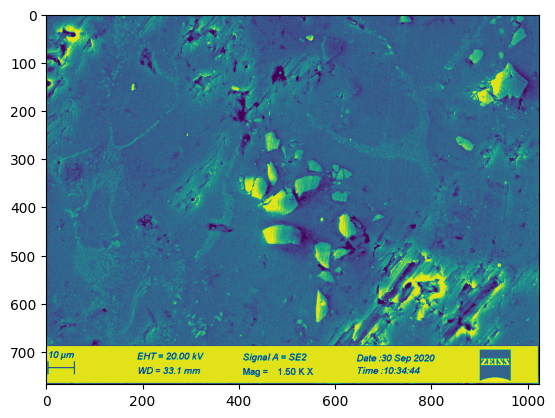

In [7]:
plt.imshow(face)
print(face.shape)

In [86]:
cv2.imshow("img1", img_scaled)
cv2.waitKey(0)

-1

In [88]:
from skimage import io, img_as_float
img_o =  img_as_float(io.imread(r"C:\Users\sneha\OneDrive\Desktop\Sem_6\OELP\particle_size_detection\SEM_images\136\3_SiC_no_UST02.tif",as_gray=True))
img_o = (img_o-np.mean(img_o.flatten()))/(np.max(img_o.flatten())-np.min(img_o.flatten()))

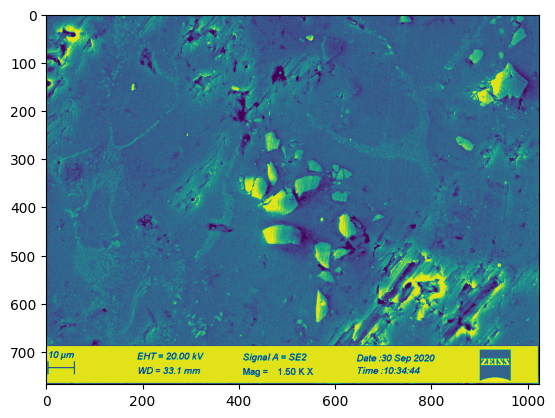

In [10]:
plt.imshow(img_o)

In [11]:
img_o.shape

(768, 1024)

In [109]:
im = img_as_float(io.imread(r"C:\Users\sneha\OneDrive\Desktop\Sem_6\OELP\particle_size_detection\SEM_images\136\3_SiC_no_UST02.tif"))
sigma_est = np.mean(estimate_sigma(im))
denoise = denoise_nl_means(im, h=1.15*sigma_est, fast_mode=True,
                          patch_size=5, patch_distance=3)

de_tv = denoise_tv_chambolle(im, weight = 0.1, eps = 0.002)

de_b3md = bm3d.bm3d(im, sigma_psd = 0.2,
                     stage_arg = bm3d.BM3DStages.ALL_STAGES)

In [110]:
denoise_ubyte = img_as_ubyte(denoise)

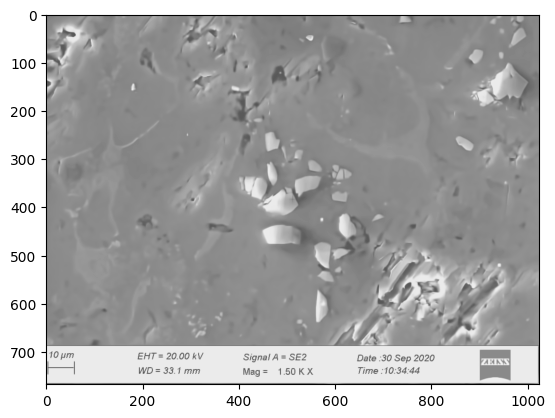

In [111]:
plt.imshow(denoise_ubyte, cmap='gray')
denoise_ubyte.shape
plt.imsave('nlm.png', denoise_ubyte, cmap='gray')

plt.imshow(de_tv, cmap='gray')
plt.imsave('tv.png', de_tv, cmap='gray')

plt.imshow(de_b3md, cmap='gray')
plt.imsave('b3md.png', de_b3md, cmap='gray')

In [15]:
# !pip install medpy
# from medpy.io import save
# save(denoise_ubyte, "index")

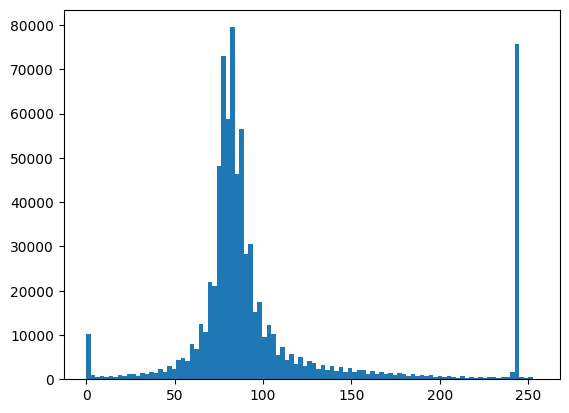

In [16]:
hist = plt.hist(denoise_ubyte.flat, bins=100, range=(0,255))

(array([1.6600e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.9400e+02,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.7400e+02, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.8900e+02, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0200e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.7600e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.1600e+02,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.9700e+02, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.2600e+02, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.4900e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.9700e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.9400e+02,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 9.5400e+02, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 7.5156e+04, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 4.6000e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.1800e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 9.2000e+01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.9800e+02, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.1900e+02, 0.00

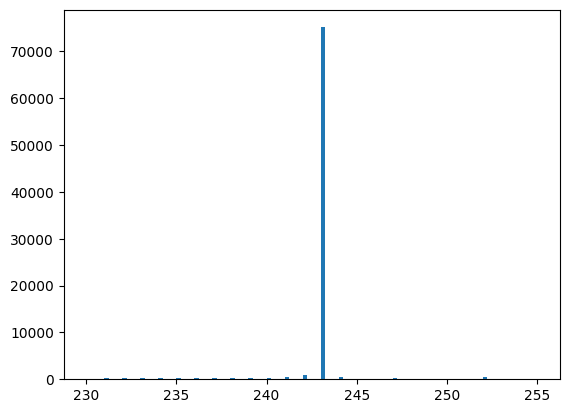

In [17]:
plt.hist(denoise_ubyte.flat, bins=100, range=(230,255))

(array([  893.,   458.,   497.,   485.,   612.,  1064.,   630.,   650.,
          700.,   759.,  1515.,   900.,   757.,   929.,  1039.,  2235.,
         1222.,  1311.,  1406.,  1607.,  3078.,  1785.,  1987.,  2178.,
         2379.,  5572.,  3344.,  3430.,  3759.,  4175.,  9625.,  5595.,
         6267.,  7246.,  8458., 20991., 13340., 15906., 18961., 21913.,
        51006., 27967., 30901., 27224., 26745., 49623., 22309., 20759.,
        18742., 17035., 28200., 11429., 10043.,  8984.,  7962., 13540.,
         6014.,  5196.,  4890.,  4610.,  8500.,  3759.,  3598.,  3334.,
         3298.,  5476.,  2562.,  2452.,  2297.,  2207.,  4131.,  2130.,
         1613.,  1721.,  1802.,  3448.,  1597.,  1542.,  1543.,  1602.,
         2560.,  1268.,  1295.,  1215.,  1235.,  2352.,  1231.,   894.,
         1061.,  1029.,  1978.,   988.,  1005.,   931.,  1023.,  1665.,
          895.,   859.,   868.,  1664.]),
 array([ 30. ,  31.2,  32.4,  33.6,  34.8,  36. ,  37.2,  38.4,  39.6,
         40.8,  42. ,  

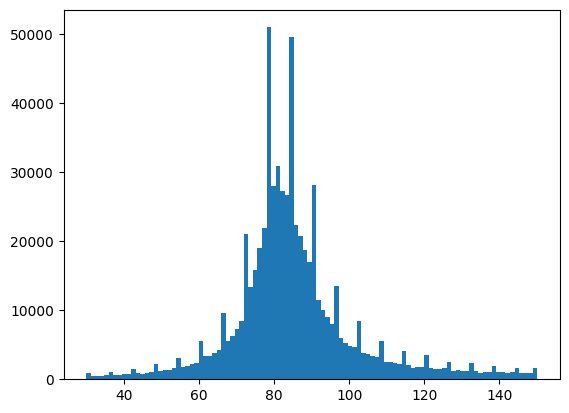

In [18]:
plt.hist(denoise_ubyte.flat, bins=100, range=(30,150))

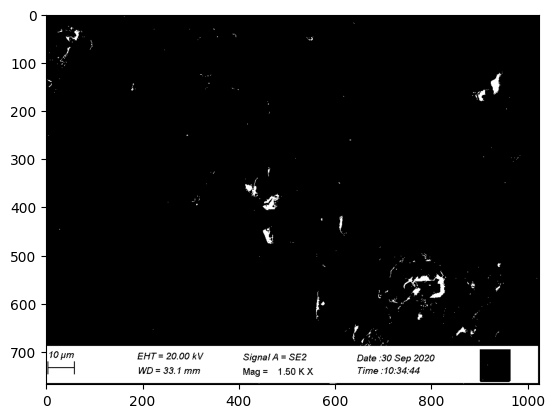

In [19]:
segm1 = (denoise_ubyte == 243)
segm2 = (denoise_ubyte > 243) & (denoise_ubyte < 243)
all_segments = np.zeros((denoise_ubyte.shape[0], denoise_ubyte.shape[1], 3))
all_segments[segm2] = (0,0,0)
all_segments[segm1] = (1,1,1)
plt.imshow(all_segments)
plt.imsave('hist_threshold_3.png', all_segments)

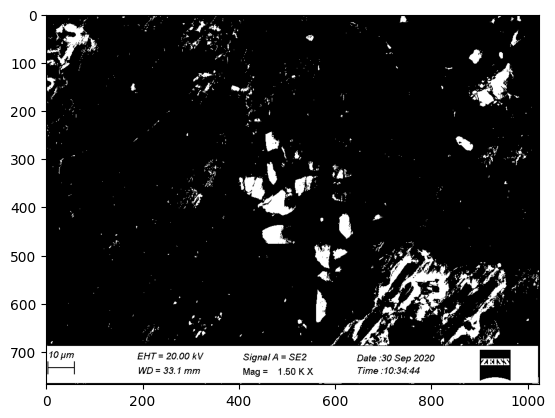

In [20]:
segm1 = (denoise_ubyte >= 150)
segm2 = (denoise_ubyte < 150)
all_segments = np.zeros((denoise_ubyte.shape[0], denoise_ubyte.shape[1], 3))
all_segments[segm2] = (0,0,0)
all_segments[segm1] = (1,1,1)
plt.imshow(all_segments)
plt.imsave('hist_threshold_2.png', all_segments)
# two segments don't capture certain grey areas properly, 
# could be the same particle 

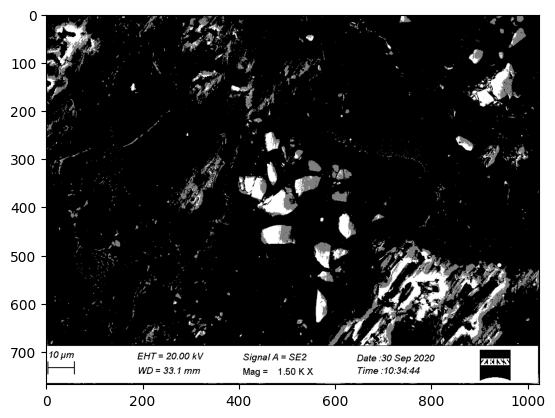

In [21]:
# variation 2
# this captures the edge boundaries better, intra-particle and inter-particle
segm1 = (denoise_ubyte >= 170)
segm2 = (denoise_ubyte < 170) & (denoise_ubyte >= 120)
segm3 = (denoise_ubyte < 120)
all_segments = np.zeros((denoise_ubyte.shape[0], denoise_ubyte.shape[1], 3))
all_segments[segm2] = (0.5,0.5,0.5)
all_segments[segm1] = (1,1,1)
all_segments[segm3] = (0,0,0)
plt.imshow(all_segments)
plt.imsave('hist_threshold_3.png', all_segments)

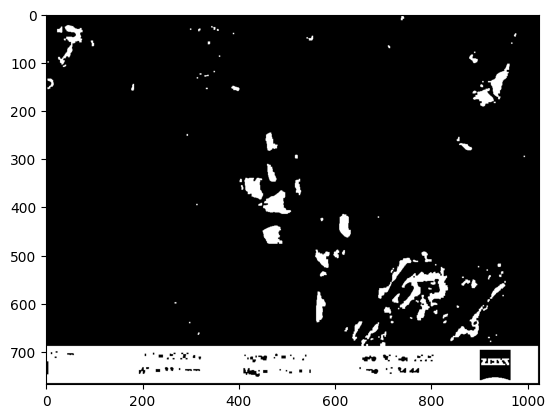

In [22]:
segm1_opened = nd.binary_opening(segm1, np.ones((3,3)))
segm1_closed = nd.binary_closing(segm1_opened, np.ones((3,3)))

segm2_opened = nd.binary_opening(segm2, np.ones((3,3)))
segm2_closed = nd.binary_closing(segm2_opened, np.ones((3,3)))

segm3_opened = nd.binary_opening(segm2, np.ones((3,3)))
segm3_closed = nd.binary_closing(segm2_opened, np.ones((3,3)))

all_segments_cleaned = np.zeros((denoise_ubyte.shape[0], denoise_ubyte.shape[1], 3))

all_segments_cleaned[segm1_closed] = (1,1,1)
all_segments_cleaned[segm2_closed] = (0.5,0.5,0.5)
all_segments_cleaned[segm3_closed] = (0,0,0)

plt.imshow(all_segments_cleaned)
# # umm... bad idea

In [23]:
#print(denoise_ubyte.type)
denoise_ubyte.shape
z = np.float32(denoise_ubyte)

In [24]:
#k means

# Define criteria = ( type, max_iter = 10 , epsilon = 1.0 )
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# Set flags (Just to avoid line break in the code)
flags = cv2.KMEANS_RANDOM_CENTERS
# Apply KMeans
compactness, labels, centers = cv2.kmeans(z, 2, None, criteria, 10, flags)
print(compactness, labels, centers)

972392501.15625 [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]

In [25]:
# A = z[labels==0]
# B = z[labels==1]
# # Now plot 'A' in red, 'B' in blue, 'centers' in yellow
# plt.hist(A,256,[0,256],color = 'r')
# plt.hist(B,256,[0,256],color = 'b')
# plt.hist(centers,32,[0,256],color = 'y')
# plt.show()

In [26]:
img2 = denoise_ubyte.reshape((-1, 3))
img2 = np.float32(img2)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
k = 2
attempts = 10
ret, label, centre = cv2.kmeans(img2, k, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)

# a very rudimentary and brute force technique
# for i in range(len(label)):
#     if label[i] == 2:
#         label[i] = 1

centre = np.uint8(centre)
res = centre[label.flatten()]
res2 = res.reshape((denoise_ubyte.shape))
# print(len(label))

# for i in range(res2.shape[0]):
#     for j in range(res2.shape[1]):
#         if 

cv2.imwrite('segmented.png', res2)
print(res2.shape)
cv2.imshow('segmented3.png', res2)
cv2.waitKey(0)

(768, 1024)


-1

In [27]:
edges = cv2.Canny(denoise_ubyte, 100, 200)

In [158]:
pixels_to_um = 0.1823
# cv2.imshow("denoised_image", denoise_ubyte)

# from skimage.filters import sobel
# sobel_img = sobel(denoise_ubyte)
# cv2.imshow("sobel", sobel_img)
# cv2.waitKey(0)

#since k means doesn't give a binary image, use otsu
ret, thresh = cv2.threshold(denoise_ubyte, 0, 255, cv2.THRESH_OTSU)

kernel = np.ones((3, 3), np.uint8)
eroded = cv2.erode(thresh, kernel, iterations = 1)
dilated = cv2.dilate(eroded, kernel, iterations = 1)
# cv2.imshow("eroded_image", eroded)
# cv2.imshow("dilated_image", dilated)
# cv2.waitKey(0)

mask = dilated == 255
s = [[1, 1, 1], [1, 1, 1], [1, 1, 1]]
labelled_mask, num_labels = nd.label(mask, structure = s)
img2 = color.label2rgb(labelled_mask, bg_label = 0)
cv2.imwrite("grains_binary_threshold.png", img2 * 255)
print(img2.shape)
cv2.imshow('coloured_grains', img2)
cv2.waitKey(0)

clusters = measure.regionprops(labelled_mask, im)

# print(clusters)

for prop in clusters:
    print(f'Label: {prop.label}, Area: {prop.area}')
    
propList = ['Area',
            'equivalent_diameter', #Added... verify if it works
            'orientation', #Added, verify if it works. Angle btwn x-axis and major axis.
            'MajorAxisLength',
            'MinorAxisLength',
            'Perimeter',
            'MinIntensity',
            'MeanIntensity',
            'MaxIntensity']
output_file = open('image_measurements.csv', 'w')
output_file.write(',' + ",".join(propList) + '\n')

for cluster_props in clusters:
    #output cluster properties to the excel file
    output_file.write(str(cluster_props['Label']))
    for i,prop in enumerate(propList):
        if(prop == 'Area'): 
            to_print = cluster_props[prop]*pixels_to_um**2   #Convert pixel square to um square
        elif(prop == 'orientation'): 
            to_print = cluster_props[prop]*57.2958  #Convert to degrees from radians
        elif(prop.find('Intensity') < 0):          # Any prop without Intensity in its name
            to_print = cluster_props[prop]*pixels_to_um
        else: 
            to_print = cluster_props[prop]     #Reamining props, basically the ones with Intensity in its name
        output_file.write(',' + str(to_print))
    output_file.write('\n')
output_file.close()

(768, 1024, 3)
Label: 1, Area: 119.0
Label: 2, Area: 9.0
Label: 3, Area: 12.0
Label: 4, Area: 123.0
Label: 5, Area: 1375.0
Label: 6, Area: 125.0
Label: 7, Area: 9.0
Label: 8, Area: 73.0
Label: 9, Area: 9.0
Label: 10, Area: 30.0
Label: 11, Area: 12.0
Label: 12, Area: 77.0
Label: 13, Area: 74.0
Label: 14, Area: 80.0
Label: 15, Area: 22.0
Label: 16, Area: 80.0
Label: 17, Area: 36.0
Label: 18, Area: 21.0
Label: 19, Area: 17.0
Label: 20, Area: 26.0
Label: 21, Area: 370.0
Label: 22, Area: 28.0
Label: 23, Area: 9.0
Label: 24, Area: 9.0
Label: 25, Area: 76.0
Label: 26, Area: 19.0
Label: 27, Area: 37.0
Label: 28, Area: 15.0
Label: 29, Area: 68.0
Label: 30, Area: 1271.0
Label: 31, Area: 15.0
Label: 32, Area: 78.0
Label: 33, Area: 12.0
Label: 34, Area: 9.0
Label: 35, Area: 194.0
Label: 36, Area: 9.0
Label: 37, Area: 18.0
Label: 38, Area: 67.0
Label: 39, Area: 36.0
Label: 40, Area: 127.0
Label: 41, Area: 9.0
Label: 42, Area: 33.0
Label: 43, Area: 785.0
Label: 44, Area: 9.0
Label: 45, Area: 9.0
Lab

In [115]:
# img1 = cv2.imread("images/grains2.jpg")
# img = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

pixels_to_um = 0.1823 # 1 pixel = 500 nm (got this from the metadata of original image)
# denoise_ubyte = new_img
#Threshold image to binary using OTSU. ALl thresholded pixels will be set to 255
ret1, thresh = cv2.threshold(denoise_ubyte, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
img_1 = im
# Morphological operations to remove small noise - opening
#To remove holes we can use closing
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

"""
let's keep those edge touching grains
"""
# from skimage.segmentation import clear_border
# opening = clear_border(opening) #Remove edge touching grains

sure_bg = cv2.dilate(opening,kernel,iterations=2)

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,3)

#Let us threshold the dist transform by 20% its max value.
#print(dist_transform.max()) gives about 21.9
ret2, sure_fg = cv2.threshold(dist_transform,0.2*dist_transform.max(),255,0)

#0.2* max value seems to separate the cells well.
#High value like 0.5 will not recognize some grain boundaries.
  
# Unknown ambiguous region is nothing but bkground - foreground
sure_fg = np.uint8(sure_fg)

unknown = cv2.subtract(sure_bg,sure_fg)
ret3, markers = cv2.connectedComponents(sure_fg)

markers = markers+10

# Now, mark the region of unknown with zero 
markers[unknown==255] = 0
#plt.imshow(markers, cmap='jet')   #Look at the 3 distinct regions.

#Now we are ready for watershed filling. 
markers = cv2.watershed(img1,markers)
#The boundary region will be marked -1
#https://docs.opencv.org/3.3.1/d7/d1b/group__imgproc__misc.html#ga3267243e4d3f95165d55a618c65ac6e1


#Let us color boundaries in yellow. OpenCv assigns boundaries to -1 after watershed.
img1[markers == -1] = [0,255,255]  

img2 = color.label2rgb(markers, bg_label=0)

cv2.imshow('Overlay on original image', img1)
cv2.imshow('Colored Grains', img2)
cv2.waitKey(0)

#Now, time to extract properties of detected cells
# regionprops function in skimage measure module calculates useful parameters for each object.
regions = measure.regionprops(markers, intensity_image=img_1)

output_file = open('image_measurements_watershed.csv', 'w')
output_file.write('Grain #' + "," + "," + ",".join(propList) + '\n') #join strings in array by commas, 
#First cell to print grain number
#Second cell blank as we will not print Label column

grain_number = 1
for region_props in regions:
    output_file.write(str(grain_number) + ',')
    #output cluster properties to the excel file
#    output_file.write(str(region_props['Label']))
    for i,prop in enumerate(propList):
        if(prop == 'Area'): 
            to_print = region_props[prop]*pixels_to_um**2   #Convert pixel square to um square
        elif(prop == 'orientation'): 
            to_print = region_props[prop]*57.2958  #Convert to degrees from radians
        elif(prop.find('Intensity') < 0):          # Any prop without Intensity in its name
            to_print = region_props[prop]*pixels_to_um
        else: 
            to_print = region_props[prop]     #Reamining props, basically the ones with Intensity in its name
        output_file.write(',' + str(to_print))
    output_file.write('\n')
    grain_number += 1

output_file.close()   #Closes the file, otherwise it would be read only. 

In [54]:
!pip install tiffile
"""
only for Zeiss SEM images
"""
import  tiffile
pixelW = 0
with tiffile.TiffFile(r"C:\Users\sneha\OneDrive\Desktop\Sem_6\OELP\particle_size_detection\SEM_images\136\3_SiC_no_UST02.tif") as tif:
    pixelW = tif.sem_metadata['ap_pixel_size'][1]
    unit = tif.sem_metadata['ap_pixel_size'][2]
    print(pixelW)
    print(unit)

182.3
nm


In [38]:
# !pip install imageai --upgrade

In [36]:
# !pip install tensorflow==2.4.0

In [37]:
# !pip install keras==2.4.3 numpy==1.19.3 pillow==7.0.0 scipy==1.4.1 h5py==2.10.0 matplotlib==3.3.2 opencv-python keras-resnet==0.2.0

In [65]:
# from imageai.Detection import ObjectDetection
# import os
# import torch
# execution_path = os.getcwd()
# detector = ObjectDetection()
# detector.setModelTypeAsRetinaNet()
# detector.setModelPath(r"C:\Users\sneha\OneDrive\Desktop\Sem_6\OELP\particle_size_detection\SEM_images\136\3_SiC_no_UST02.tif")
# # detector.setModelPath( os.path.join(execution_path , "resnet50_coco_best_v2.1.0.h5"))
# detector.loadModel()
# detections = detector.detectObjectsFromImage(input_image=os.path.join(execution_path , "detection.jpg"), output_image_path=os.path.join(execution_path , "imagenew.jpg"))

# for eachObject in detections:
#     print(eachObject["name"] , " : " , eachObject["percentage_probability"] )

In [50]:
import os
dir_i = r"C:\Users\sneha\OneDrive\Desktop\Sem_6\OELP\particle_size_detection\SEM_images\136"
dir_store = r"C:\Users\sneha\OneDrive\Desktop\Sem_6\OELP\particle_size_detection\SEM_images\augment"
def rotate (dir_i, dir_store):
    if os.path.exists(dir_i) == False:
        return
    if os.path.exists(dir_store) == False:
        os.makedirs(dir_store)
    for i, images in enumerate(os.listdir(dir_i)):
        if (images.endswith(".tif")):
            img_path = dir_i + "\\" + images
            # print(img_path)
            image = cv2.imread(img_path)
            rows = image.shape[0]
            cols = image.shape[1]
            M = cv2.getRotationMatrix2D((cols/2, rows/2), -180, 1)
            rotate_180 = cv2.warpAffine(image ,M , (cols, rows)) 

            # rotate_180 = cv2.rotate(images, cv2.ROTATE_180)
            path = dir_store + "\\augment_" + str(images)
            cv2.imwrite(path, rotate_180)

rotate(dir_i, dir_store)

In [55]:
!git clone https://github.com/WongKinYiu/yolov7.git

Cloning into 'yolov7'...


In [61]:
%cd yolov7
!pip install -r requirements.txt

  Using cached requests-2.28.2-py3-none-any.whl (62 kB)
  Using cached torch-2.0.0-cp310-cp310-win_amd64.whl (172.3 MB)
  Using cached torchvision-0.15.1-cp310-cp310-win_amd64.whl (1.2 MB)
  Using cached tensorboard-2.12.0-py3-none-any.whl (5.6 MB)
  Using cached pandas-1.5.3-cp310-cp310-win_amd64.whl (10.4 MB)
  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)
  Using cached charset_normalizer-3.1.0-cp310-cp310-win_amd64.whl (97 kB)
  Using cached idna-3.4-py3-none-any.whl (61 kB)
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached filelock-3.10.4-py3-none-any.whl (10 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached grpcio-1.51.3-cp310-cp310-win_amd64.whl (3.7 MB)
  Using cached Markdown-3.4.3-py3-none-any.whl (93 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached google_auth-2.16.3-py2.py3-none-any.whl (177 kB)
  Using cached Werkzeug

In [56]:
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-e6e.pt SEM_images/136 

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [64]:
%cd yolov7
!python detect.py --weights yolov7-e6e.pt --source ../SEM_images/136

[WinError 2] The system cannot find the file specified: 'yolov7'
C:\Users\sneha\OneDrive\Desktop\Sem_6\OELP\particle_size_detection\yolov7
Namespace(weights=['yolov7-e6e.pt'], source='../SEM_images/136', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
Fusing layers... 
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

Done. (2352.3ms) Inference, (9.0ms) NMS
 The image with the result is saved in: runs\detect\exp3\1_SiC_no_UST1.tif
1 donut, Done. (1789.2ms) Inference, (85.2ms) NMS
 The image with the result is saved in: runs\detect\exp3\1_SiC_no_UST2.tif
1 airplane, Done. (1849.1ms) Inference, (2.0ms) NMS
 The image with the result is saved in: runs\detect\exp3\1_SiC_no_UST3.tif
Done. (1662.6ms) Inference, (1.0ms) NMS
 The image with the result is saved

YOLOR  v0.1-122-g3b41c2c torch 2.0.0+cpu CPU

Model Summary: 792 layers, 151687420 parameters, 817020 gradients
C:\Users\sneha\anaconda3\envs\oelp\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [166]:
# def otsu(img):
#     th = 0
#     max_val = 255
    
#     ret, o1 = cv2.threshold(img, th, max_val, cv2.THRESH_BINARY + cv2.THRESH_OTSU )
#     ret, o2 = cv2.threshold(img, th, max_val, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU )
#     ret, o3 = cv2.threshold(img, th, max_val, cv2.THRESH_TOZERO + cv2.THRESH_OTSU )
#     ret, o4 = cv2.threshold(img, th, max_val, cv2.THRESH_TOZERO_INV + cv2.THRESH_OTSU )
#     ret, o5 = cv2.threshold(img, th, max_val, cv2.THRESH_TRUNC + cv2.THRESH_OTSU )
    
#     output = [img, o1, o2, o3, o4, o5]
#     return output

# otsu_output = otsu(sobel_filter)
# titles = ['Original', 'Binary', 'Binary Inv',
#               'Zero', 'Zero Inv', 'Trunc']

# img1 = o3
# imge = morph(img)
# imgo = otsu(o3)
# imgk = color_quantization(imgo[0], k=3)
# # line_size, blur_value = 1023,-20
# line_size, blur_value = 91,-10
# img2 = edge_mask(imgk, line_size, blur_value)
# img3 = sobel(img2)

NameError: name 'sobel_filter' is not defined

In [165]:
# # # Load the binary image
# img3 = cv2.imread(r'C:\Users\sneha\OneDrive\Desktop\Sem_6\OELP\particle_size_detection\SEM_images\136\3_SiC_no_UST02.tif', cv2.IMREAD_UNCHANGED)
# img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
# img3 = cv2.bilateralFilter(img3, 5, 6, 6)
# # Threshold the image
ret, thresh = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY)

cv2.imshow("Binary_segmented", thresh)
cv2.waitKey(0)

# Find the contours of the objects
contours_touple, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contours = list(contours_touple)

ratio_list = []
ratio_list = []
removed_contours = []
new_contours = []

dc_contours = copy.deepcopy(contours)

for cnt in contours:
    perimeter = cv2.arcLength(cnt, True)
    area = cv2.contourArea(cnt)
    if area !=0 :
        ratio = (perimeter**2) / area
        ratio_list.append(ratio)
    else :
        ratio_list.append(0)
        
countr = 0
sumr = 0
for i in ratio_list:
    if i != 0:
        sumr+=i
        countr+=1
        
meanr = sumr/countr
        
for i, cnt in enumerate(contours):
    if ratio_list[i] <= (max(ratio_list)/3):
        perimeter = cv2.arcLength(cnt, True)
        area = cv2.contourArea(cnt)
        if area>5 and perimeter>5:
            new_contours.append(cnt)

# Create a new binary image with the filtered contours
new_img = np.zeros(denoise_ubyte.shape, dtype=np.uint8)
cv2.drawContours(new_img, new_contours, -1, (255, 255, 255), cv2.FILLED)
            
# Display the original and filtered images
plt.imshow(denoise_ubyte, cmap = 'gray')
plt.show()
plt.imshow(new_img, cmap = 'gray')
plt.show()

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


In [114]:
# using random forests

img_rd = cv2.imread(r'C:\Users\sneha\OneDrive\Desktop\Sem_6\OELP\particle_size_detection\SEM_images\136\3_SiC_no_UST02.tif')
img_rd = cv2.cvtColor(img_rd, cv2.COLOR_BGR2GRAY)  

img2 = img_rd.reshape(-1)
df = pd.DataFrame()
df['Original Image'] = img2

num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
kernels = []
for theta in range(2):   #Define number of thetas
    theta = theta / 4. * np.pi
    for sigma in (1, 3):  #Sigma with 1 and 3
        for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
            for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5
            
                
                gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
#                print(gabor_label)
                ksize=9
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                #Now filter the image and add values to a new column 
                fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                num += 1  #Increment for gabor column label
                
#CANNY EDGE
edges = cv2.Canny(img, 100,200)   #Image, min and max values
edges1 = edges.reshape(-1)
df['Canny Edge'] = edges1 #Add column to original dataframe

from skimage.filters import roberts, sobel, scharr, prewitt

#ROBERTS EDGE
edge_roberts = roberts(img)
edge_roberts1 = edge_roberts.reshape(-1)
df['Roberts'] = edge_roberts1

#SOBEL
edge_sobel = sobel(img)
edge_sobel1 = edge_sobel.reshape(-1)
df['Sobel'] = edge_sobel1

#SCHARR
edge_scharr = scharr(img)
edge_scharr1 = edge_scharr.reshape(-1)
df['Scharr'] = edge_scharr1

#PREWITT
edge_prewitt = prewitt(img)
edge_prewitt1 = edge_prewitt.reshape(-1)
df['Prewitt'] = edge_prewitt1

#GAUSSIAN with sigma=3
from scipy import ndimage as nd
gaussian_img = nd.gaussian_filter(img, sigma=3)
gaussian_img1 = gaussian_img.reshape(-1)
df['Gaussian s3'] = gaussian_img1

#GAUSSIAN with sigma=7
gaussian_img2 = nd.gaussian_filter(img, sigma=7)
gaussian_img3 = gaussian_img2.reshape(-1)
df['Gaussian s7'] = gaussian_img3

#MEDIAN with sigma=3
median_img = nd.median_filter(img, size=3)
median_img1 = median_img.reshape(-1)
df['Median s3'] = median_img1

# #VARIANCE with size=3
# variance_img = nd.generic_filter(img, np.var, size=3)
# variance_img1 = variance_img.reshape(-1)
# df['Variance s3'] = variance_img1  #Add column to original dataframe

####################

labeled_img = cv2.imread('r'C:\Users\sneha\OneDrive\Desktop\Sem_6\OELP\particle_size_detection\SEM_images\masked_images\3_SiC_no_UST02.tif')
#Remember that you can load an image with partial labels 
#But, drop the rows with unlabeled data

labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_BGR2GRAY)
labeled_img1 = labeled_img.reshape(-1)
df['Labels'] = labeled_img1

print(df.head())

######################
                         

# possibility of labelling image has to be explored

In [157]:
img4 = cv2.imread(r'C:\Users\sneha\OneDrive\Desktop\Sem_6\OELP\particle_size_detection\SEM_images\136\3_SiC_no_UST02.tif', cv2.IMREAD_UNCHANGED)
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(denoise_ubyte, 100,200)
cv2.imshow("Canny", edges)
cv2.waitKey(0)
cv2.imwrite("Canny.jpg", edges)

# contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# contours = contours[0] if len(contours) == 2 else contours[1]
# big_contour = max(contours, key=cv2.contourArea)

# # draw white filled contour on black background
# result = np.zeros_like(edges)
# cv2.drawContours(result, [big_contour], 0, (255,255,255), cv2.FILLED)

rect=cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dilation = cv2.dilate(edges,rect,iterations = 4)
erosion = cv2.erode(dilation, rect, iterations=4)

cv2.imshow("Filled", erosion)
cv2.waitKey(0)
cv2.imwrite("Dilate_erode_Canny_filled.jpg", erosion)

True